# Introduction
This is the second case study from 8WEEKSQLCHALLENGE cource: https://8weeksqlchallenge.com/case-study-2/

Did you know that over 115 million kilograms of pizza is consumed daily worldwide??? (Well according to Wikipedia anyway…)

Danny was scrolling through his Instagram feed when something really caught his eye - “80s Retro Styling and Pizza Is The Future!”

Danny was sold on the idea, but he knew that pizza alone was not going to help him get seed funding to expand his new Pizza Empire - so he had one more genius idea to combine with it - he was going to Uberize it - and so Pizza Runner was launched!

Danny started by recruiting “runners” to deliver fresh pizza from Pizza Runner Headquarters (otherwise known as Danny’s house) and also maxed out his credit card to pay freelance developers to build a mobile app to accept orders from customers.

## Problem Statement
Danny wants to use the data to answer a few simple questions about purchase, runner and customer experience, ingredient optimisation, pricing and ratings.
Danny has collected data in the DB, so we can use it.

Danny has shared with you 6 key datasets for this case study:

- runners
- customer_orders
- runner_orders
- pizza_names
- pizza_recipes
- pizza_toppings

## Case Study Questions
This case study has LOTS of questions - they are broken up by area of focus including:

Pizza Metrics
Runner and Customer Experience
Ingredient Optimisation
Pricing and Ratings
Bonus DML Challenges (DML = Data Manipulation Language)
Each of the following case study questions can be answered using a single SQL statement.

__A. Pizza Metrics__

1. How many pizzas were ordered?
2. How many unique customer orders were made?
3. How many successful orders were delivered by each runner?
4. How many of each type of pizza was delivered?
5. How many Vegetarian and Meatlovers were ordered by each customer?
6. What was the maximum number of pizzas delivered in a single order?
7. For each customer, how many delivered pizzas had at least 1 change and how many had no changes?
8. How many pizzas were delivered that had both exclusions and extras?
9. What was the total volume of pizzas ordered for each hour of the day?
10. What was the volume of orders for each day of the week?

__B. Runner and Customer Experience__

1. How many runners signed up for each 1 week period? (i.e. week starts 2021-01-01)
2. What was the average time in minutes it took for each runner to arrive at the Pizza Runner HQ to pickup the order?
3. Is there any relationship between the number of pizzas and how long the order takes to prepare?
4. What was the average distance travelled for each customer?
5. What was the difference between the longest and shortest delivery times for all orders?
6. What was the average speed for each runner for each delivery and do you notice any trend for these values?
7. What is the successful delivery percentage for each runner?

__C. Ingredient Optimisation__

1. What are the standard ingredients for each pizza?
2. What was the most commonly added extra?
3. What was the most common exclusion?
4. Generate an order item for each record in the customers_orders table in the format of one of the following:
- Meat Lovers
- Meat Lovers - Exclude Beef
- Meat Lovers - Extra Bacon
- Meat Lovers - Exclude Cheese, Bacon - Extra Mushroom, Peppers
5. Generate an alphabetically ordered comma separated ingredient list for each pizza order from the customer_orders table and add a 2x in front of any relevant ingredients
- For example: "Meat Lovers: 2xBacon, Beef, ... , Salami"
6. What is the total quantity of each ingredient used in all delivered pizzas sorted by most frequent first?

__D. Pricing and Ratings__

1. If a Meat Lovers pizza costs $12 and Vegetarian costs $10 and there were no charges for changes - how much money has Pizza Runner made so far if there are no delivery fees?
2. What if there was an additional $1 charge for any pizza extras?
- Add cheese is $1 extra
3. The Pizza Runner team now wants to add an additional ratings system that allows customers to rate their runner, how would you design an additional table for this new dataset - generate a schema for this new table and insert your own data for ratings for each successful customer order between 1 to 5.
4. Using your newly generated table - can you join all of the information together to form a table which has the following information for successful deliveries?
- customer_id
- order_id
- runner_id
- rating
- order_time
- pickup_time
- Time between order and pickup
- Delivery duration
- Average speed
- Total number of pizzas
5. If a Meat Lovers pizza was $12 and Vegetarian $10 fixed prices with no cost for extras and each runner is paid $0.30 per kilometre traveled - how much money does Pizza Runner have left over after these deliveries?

# Preparation

## Import libraries and setup dependencies

In [1]:
import iplantuml

In [2]:
%load_ext sql

In [3]:
%sql sqlite:///pizza_runner.db

## Entity relationship diagram

Writing output for /Users/dzianiskuziomkin/Repositories/case_study_1/pizza_runner/592978f7-fec9-466e-80d6-9386d942e56a.uml to 592978f7-fec9-466e-80d6-9386d942e56a.svg


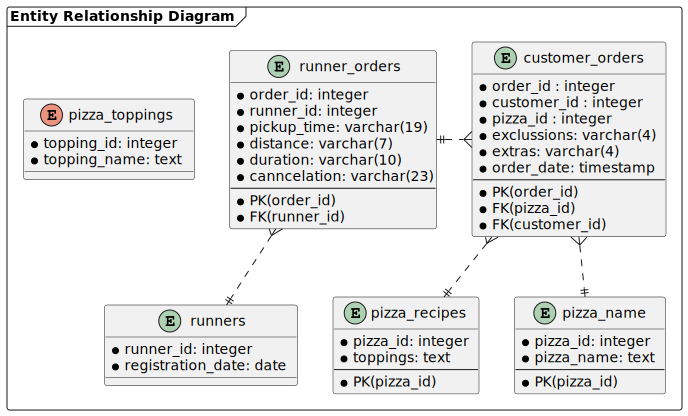

In [4]:
%%plantuml 

@startuml

frame "Entity Relationship Diagram"{

    /' entities '/ 

    entity customer_orders {
    * order_id : integer
    * customer_id : integer
    * pizza_id : integer
    * exclussions: varchar(4)
    * extras: varchar(4)
    * order_date: timestamp
    ---
    * PK(order_id)
    * FK(pizza_id)
    * FK(customer_id)
    }

    entity pizza_name {
        * pizza_id: integer
        * pizza_name: text 
        ---
        * PK(pizza_id)
    }

    entity pizza_recipes {
        * pizza_id: integer
        * toppings: text
        ---
        * PK(pizza_id)
    }

    enum pizza_toppings {
        * topping_id: integer
        * topping_name: text
    }

    entity runner_orders {
        * order_id: integer
        * runner_id: integer
        * pickup_time: varchar(19)
        * distance: varchar(7)
        * duration: varchar(10)
        * canncelation: varchar(23)
        ---
        * PK(order_id)
        * FK(runner_id)
    }

    entity runners {
        * runner_id: integer
        * registration_date: date
    }

     /' relationship '/ 

    customer_orders }.left.|| runner_orders
    runner_orders }..|| runners
    customer_orders }..|| pizza_name
    customer_orders }..|| pizza_recipes

}


@enduml

## Create and populate schema

Create tables:
- runners
- customer_orders
- runner_orders
- pizza_names
- pizza_recipes
- pizza_toppings

And populated tables by values

In [5]:
%%sql

DROP TABLE IF EXISTS runners;
CREATE TABLE runners (
  "runner_id" INTEGER,
  "registration_date" DATE
);
INSERT INTO runners
  ("runner_id", "registration_date")
VALUES
  (1, '2021-01-01'),
  (2, '2021-01-03'),
  (3, '2021-01-08'),
  (4, '2021-01-15');


DROP TABLE IF EXISTS customer_orders;
CREATE TABLE customer_orders (
  "order_id" INTEGER,
  "customer_id" INTEGER,
  "pizza_id" INTEGER,
  "exclusions" VARCHAR(4),
  "extras" VARCHAR(4),
  "order_time" TIMESTAMP
);

INSERT INTO customer_orders
  ("order_id", "customer_id", "pizza_id", "exclusions", "extras", "order_time")
VALUES
  ('1', '101', '1', '', '', '2020-01-01 18:05:02'),
  ('2', '101', '1', '', '', '2020-01-01 19:00:52'),
  ('3', '102', '1', '', '', '2020-01-02 23:51:23'),
  ('3', '102', '2', '', NULL, '2020-01-02 23:51:23'),
  ('4', '103', '1', '4', '', '2020-01-04 13:23:46'),
  ('4', '103', '1', '4', '', '2020-01-04 13:23:46'),
  ('4', '103', '2', '4', '', '2020-01-04 13:23:46'),
  ('5', '104', '1', 'null', '1', '2020-01-08 21:00:29'),
  ('6', '101', '2', 'null', 'null', '2020-01-08 21:03:13'),
  ('7', '105', '2', 'null', '1', '2020-01-08 21:20:29'),
  ('8', '102', '1', 'null', 'null', '2020-01-09 23:54:33'),
  ('9', '103', '1', '4', '1, 5', '2020-01-10 11:22:59'),
  ('10', '104', '1', 'null', 'null', '2020-01-11 18:34:49'),
  ('10', '104', '1', '2, 6', '1, 4', '2020-01-11 18:34:49');


DROP TABLE IF EXISTS runner_orders;
CREATE TABLE runner_orders (
  "order_id" INTEGER,
  "runner_id" INTEGER,
  "pickup_time" VARCHAR(19),
  "distance" VARCHAR(7),
  "duration" VARCHAR(10),
  "cancellation" VARCHAR(23)
);

INSERT INTO runner_orders
  ("order_id", "runner_id", "pickup_time", "distance", "duration", "cancellation")
VALUES
  ('1', '1', '2020-01-01 18:15:34', '20km', '32 minutes', ''),
  ('2', '1', '2020-01-01 19:10:54', '20km', '27 minutes', ''),
  ('3', '1', '2020-01-03 00:12:37', '13.4km', '20 mins', NULL),
  ('4', '2', '2020-01-04 13:53:03', '23.4', '40', NULL),
  ('5', '3', '2020-01-08 21:10:57', '10', '15', NULL),
  ('6', '3', 'null', 'null', 'null', 'Restaurant Cancellation'),
  ('7', '2', '2020-01-08 21:30:45', '25km', '25mins', 'null'),
  ('8', '2', '2020-01-10 00:15:02', '23.4 km', '15 minute', 'null'),
  ('9', '2', 'null', 'null', 'null', 'Customer Cancellation'),
  ('10', '1', '2020-01-11 18:50:20', '10km', '10minutes', 'null');


DROP TABLE IF EXISTS pizza_names;
CREATE TABLE pizza_names (
  "pizza_id" INTEGER,
  "pizza_name" TEXT
);
INSERT INTO pizza_names
  ("pizza_id", "pizza_name")
VALUES
  (1, 'Meatlovers'),
  (2, 'Vegetarian');


DROP TABLE IF EXISTS pizza_recipes;
CREATE TABLE pizza_recipes (
  "pizza_id" INTEGER,
  "toppings" TEXT
);
INSERT INTO pizza_recipes
  ("pizza_id", "toppings")
VALUES
  (1, '1, 2, 3, 4, 5, 6, 8, 10'),
  (2, '4, 6, 7, 9, 11, 12');


DROP TABLE IF EXISTS pizza_toppings;
CREATE TABLE pizza_toppings (
  "topping_id" INTEGER,
  "topping_name" TEXT
);
INSERT INTO pizza_toppings
  ("topping_id", "topping_name")
VALUES
  (1, 'Bacon'),
  (2, 'BBQ Sauce'),
  (3, 'Beef'),
  (4, 'Cheese'),
  (5, 'Chicken'),
  (6, 'Mushrooms'),
  (7, 'Onions'),
  (8, 'Pepperoni'),
  (9, 'Peppers'),
  (10, 'Salami'),
  (11, 'Tomatoes'),
  (12, 'Tomato Sauce');

 * sqlite:///pizza_runner.db
Done.
Done.
4 rows affected.
Done.
Done.
14 rows affected.
Done.
Done.
10 rows affected.
Done.
Done.
2 rows affected.
Done.
Done.
2 rows affected.
Done.
Done.
12 rows affected.


[]

# A. Pizza Metrics

## 1 How many pizzas were ordered?

In [6]:
%%sql

SELECT
    COUNT(pizza_id) AS total_ordered_pizzas
FROM
    customer_orders

 * sqlite:///pizza_runner.db
Done.


total_ordered_pizzas
14


## 2 How many unique customer orders were made?

In [7]:
%%sql

SELECT
    COUNT(DISTINCT order_id) AS unique_customers_orders
FROM
    customer_orders

 * sqlite:///pizza_runner.db
Done.


unique_customers_orders
10


## 3 How many successful orders were delivered by each runner?

In [16]:
%%sql

WITH successful_delivered AS(
    SELECT *
    FROM
        runner_orders
    WHERE 
        cancellation IN ("", "null") 
        OR cancellation IS NULL
)

SELECT
    COUNT(order_id) AS total_successful_delivered
FROM
    successful_delivered

 * sqlite:///pizza_runner.db
Done.


total_successful_delivered
8


## 4 How many of each type of pizza was delivered?

In [17]:
%%sql

WITH delivered_order_types AS(
    SELECT
        ro.order_id
        , co.pizza_id
    FROM
        customer_orders AS co 
    LEFT JOIN runner_orders AS ro ON co.order_id = ro.order_id
    WHERE
        cancellation IN ("", "null") 
        OR cancellation IS NULL
)

SELECT 
    pizza_id
    , COUNT(order_id) AS total_delivered
FROM
    delivered_order_types
GROUP BY pizza_id

    

 * sqlite:///pizza_runner.db
Done.


pizza_id,total_delivered
1,9
2,3


## 5 How many Vegetarian and Meatlovers were ordered by each customer?

In [10]:
%%sql

SELECT
    co.customer_id
    , pn.pizza_name
    , COUNT(pn.pizza_name) AS total_ordered
FROM
    customer_orders AS co 
LEFT JOIN pizza_names AS pn ON co.pizza_id = pn.pizza_id
GROUP BY 
    co.customer_id
    , pn.pizza_id

 * sqlite:///pizza_runner.db
Done.


customer_id,pizza_name,total_ordered
101,Meatlovers,2
101,Vegetarian,1
102,Meatlovers,2
102,Vegetarian,1
103,Meatlovers,3
103,Vegetarian,1
104,Meatlovers,3
105,Vegetarian,1


## 6 What was the maximum number of pizzas delivered in a single order?

In [18]:
%%sql 

WITH count_pizzas AS(
    SELECT
        co.order_id
        , COUNT(co.pizza_id) AS pizza_number
    FROM
        customer_orders AS co 
    LEFT JOIN runner_orders AS ro ON co.order_id = ro.order_id
    WHERE
        cancellation IN ("", "null") 
        OR cancellation IS NULL
    GROUP BY 
        co.order_id
)

SELECT 
    MAX(pizza_number) AS max_pizzas_delivered
FROM
    count_pizzas

 * sqlite:///pizza_runner.db
Done.


max_pizzas_delivered
3


## 7 For each customer, how many delivered pizzas had at least 1 change and how many had no changes?

In [15]:
%%sql

WITH delivered_orders AS (
    SELECT
        ro.order_id
        , co.pizza_id
        , co.customer_id
        , co.exclusions
        , co.extras
    FROM
        customer_orders AS co 
    LEFT JOIN runner_orders AS ro ON co.order_id = ro.order_id
    WHERE 
        cancellation IN ("", "null") 
        OR cancellation IS NULL
),

changed_pizza AS (
    SELECT 
        customer_id
        , COUNT(pizza_id) AS total_changed
    FROM
        delivered_orders
    WHERE
        (exclusions NOT IN ("", "null") AND exclusions IS NOT NULL)
        OR (extras NOT IN ("", "null") AND extras IS NOT NULL)
    GROUP BY 
        customer_id
),

not_changed_pizza AS (
    SELECT 
        customer_id
        , COUNT(pizza_id) AS total_not_changed
    FROM
        delivered_orders
    WHERE
        (exclusions IN ("", "null") OR exclusions IS NULL)
        AND (extras IN ("", "null") OR extras IS NULL)
    GROUP BY 
        customer_id
)

SELECT DISTINCT
    co.customer_id
    , cp.total_changed
    , ncp.total_not_changed
FROM
    customer_orders AS co 
LEFT JOIN changed_pizza AS cp ON cp.customer_id = co.customer_id
LEFT JOIN not_changed_pizza AS ncp ON ncp.customer_id = co.customer_id




 * sqlite:///pizza_runner.db
Done.


customer_id,total_changed,total_not_changed
101,None,2
102,None,3
103,3,None
104,2,1
105,1,None


## 8 How many pizzas were delivered that had both exclusions and extras?

In [20]:
%%sql

WITH delivered_orders AS (
    SELECT
        ro.order_id
        , co.pizza_id
        , co.customer_id
        , co.exclusions
        , co.extras
    FROM
        customer_orders AS co 
    LEFT JOIN runner_orders AS ro ON co.order_id = ro.order_id
    WHERE 
        cancellation IN ("", "null") 
        OR cancellation IS NULL
)

SELECT 
    COUNT(pizza_id) AS total_exclussions_extras
FROM
    delivered_orders
WHERE
    (exclusions NOT IN ("", "null") AND exclusions IS NOT NULL)
    AND (extras NOT IN ("", "null") AND extras IS NOT NULL)


 * sqlite:///pizza_runner.db
Done.


total_exclussions_extras
1


## 9 What was the total volume of pizzas ordered for each hour of the day?

In [61]:
%%sql

SELECT
    STRFTIME("%H",order_time) AS hour_of_day
    , COUNT(STRFTIME("%H",order_time)) AS total_orders
FROM
    customer_orders
GROUP BY 
    STRFTIME("%H",order_time)
ORDER BY 
    total_orders DESC

 * sqlite:///pizza_runner.db
Done.


hour_of_day,total_orders
23,3
21,3
18,3
13,3
19,1
11,1


## 10 What was the volume of orders for each day of the week?

In [62]:
%%sql 

SELECT
    CASE
        WHEN STRFTIME("%w", order_time) = "0" THEN "Sunday"
        WHEN STRFTIME("%w", order_time) = "1" THEN "Monday"
        WHEN STRFTIME("%w", order_time) = "2" THEN "Tuesday"
        WHEN STRFTIME("%w", order_time) = "3" THEN "Wednesday"
        WHEN STRFTIME("%w", order_time) = "4" THEN "Thursday"
        WHEN STRFTIME("%w", order_time) = "5" THEN "Friday"
        WHEN STRFTIME("%w", order_time) = "6" THEN "Saturday"
    END AS day_of_week
    , COUNT(STRFTIME("%w", order_time)) AS total_orders
FROM
    customer_orders
GROUP BY 
    day_of_week
ORDER BY 
    total_orders DESC

 * sqlite:///pizza_runner.db
Done.


day_of_week,total_orders
Wednesday,5
Saturday,5
Thursday,3
Friday,1


# B. Runner and Customer Experience

## 1 How many runners signed up for each 1 week period? (i.e. week starts 2021-01-01)

In [70]:
%%sql 

SELECT
    CAST(STRFTIME("%W", registration_date) AS int) + 1 AS week_of_year
    , COUNT(runner_id) AS total_signedup
FROM 
    runners
GROUP BY 
    week_of_year

 * sqlite:///pizza_runner.db
Done.


week_of_year,total_signedup
1,2
2,1
3,1


## 2 What was the average time in minutes it took for each runner to arrive at the Pizza Runner HQ to pickup the order?

In [92]:
%%sql 

SELECT DISTINCT
    ro.runner_id
    , AVG((STRFTIME("%J", ro.pickup_time) - STRFTIME("%J", co.order_time)) * 3600) AS pickup_time
FROM 
    customer_orders AS co
LEFT JOIN runner_orders AS ro ON co.order_id = ro.order_id
GROUP BY 
    ro.runner_id

 * sqlite:///pizza_runner.db
Done.


runner_id,pickup_time
1,39.19444475322962
2,59.299997203052044
3,26.166667230427265


In [98]:
%%sql 

SELECT DISTINCT
    co.order_id
    , ro.runner_id
    , (STRFTIME("%J", ro.pickup_time) - STRFTIME("%J", co.order_time)) * 1440 AS pickup_time
FROM 
    customer_orders AS co
LEFT JOIN runner_orders AS ro ON co.order_id = ro.order_id

 * sqlite:///pizza_runner.db
Done.


order_id,runner_id,pickup_time
1,1,10.533333867788315
2,1,10.033333897590637
3,1,21.233332827687263
4,2,29.283331409096718
5,3,10.466666892170906
6,3,None
7,2,10.266666635870934
8,2,20.483333542943
9,2,None
10,1,15.516666993498802
